In [10]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
from sklearn import metrics 
import seaborn as sn

In [4]:
data = pd.read_csv("C:/Users/USER/Downloads/college_student_placement_dataset.csv")
data.tail()


TypeError: 'tuple' object is not callable

In [5]:
data.shape

(10000, 10)

In [6]:
data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [17]:
x=data.iloc[:,1:-1].values  
y=data.iloc[:,-1].values
print(x,y)

[[107 161 173 ...   8   8   4]
 [ 97  52  82 ...   7   8   0]
 [109  36 128 ...   3   1   1]
 ...
 [ 89 108 170 ...   3   9   5]
 [107 377 437 ...   7   5   1]
 [109 441 522 ...   3   5   5]] [0 0 0 ... 0 0 0]


In [11]:
label=LabelEncoder()
data['Prev_Sem_Result']=label.fit_transform (data['Prev_Sem_Result'])
data['CGPA']=label.fit_transform (data['CGPA'])
data['Internship_Experience']=label.fit_transform (data['Internship_Experience'])
data['Placement']=label.fit_transform (data['Placement'])
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,341,374,4,0,1,8,0,1
9996,CLG0098,70,425,479,7,0,0,7,2,0
9997,CLG0066,89,108,170,3,1,3,9,5,0
9998,CLG0045,107,377,437,3,0,7,5,1,0
9999,CLG0060,109,441,522,8,0,3,5,5,0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) 
print(x_train, x_test, y_train, y_test)

[[ 87 265 329 ...  10   6   0]
 [ 96 430 508 ...   3   3   4]
 [112 422 451 ...  10   8   3]
 ...
 [109 444 452 ...   8   1   2]
 [ 96 417 449 ...   0   7   5]
 [108 311 357 ...   4   7   4]] [[102 112 174 ...   5   7   1]
 [118 113 205 ...   5   1   3]
 [103  15  49 ...  10   7   5]
 ...
 [105 443 453 ...   8   3   0]
 [ 87 139 177 ...   1   4   2]
 [ 96 190 260 ...   9   4   3]] [0 0 1 ... 0 0 0] [0 0 0 ... 0 0 0]


In [20]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler() 
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test) 
print(x_train,x_test)

[[-0.83156465  0.07741321  0.20767389 ...  1.58485212  0.14782208
  -1.45120134]
 [-0.23625349  1.21923011  1.42561993 ... -0.62976471 -0.8824679
   0.87005759]
 [ 0.82207747  1.16386929  1.03778237 ...  1.58485212  0.83468207
   0.28974286]
 ...
 [ 0.62364041  1.31611155  1.04458653 ...  0.95210446 -1.56932789
  -0.29057188]
 [-0.23625349  1.12926878  1.02417403 ... -1.57888622  0.49125208
   1.45037232]
 [ 0.55749473  0.39573792  0.39819059 ... -0.31339088  0.49125208
   0.87005759]] [[ 0.16062062 -0.98136247 -0.84697212 ...  0.00298295  0.49125208
  -0.87088661]
 [ 1.21895157 -0.97444236 -0.63604291 ...  0.00298295 -1.56932789
   0.28974286]
 [ 0.22676631 -1.6526124  -1.69749309 ...  1.58485212  0.49125208
   1.45037232]
 ...
 [ 0.35905767  1.30919144  1.0513907  ...  0.95210446 -0.8824679
  -1.45120134]
 [-0.83156465 -0.7945197  -0.82655961 ... -1.26251238 -0.53903791
  -0.29057188]
 [-0.23625349 -0.44159447 -0.26181369 ...  1.26847829 -0.53903791
   0.28974286]]


In [21]:
results=[] 
for i in [1,2,3,4,5]: 
    model = KNeighborsClassifier(n_neighbors=i, 
metric='minkowski', p=2) 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    Accuracy_score=metrics.accuracy_score(y_test, y_pred) 
    results.append(Accuracy_score) 
 
print('KNN [ minkowski ]') 
print('for n_neighbor=5 : ') 
conf_mat=metrics.confusion_matrix(y_test, y_pred) 
print('\n Confusion Matrix : ', conf_mat) 
print('Accuracy Score : ', Accuracy_score) 
print('Accuracy in Percentage : ', 
int(Accuracy_score*100),'%') 
print('\n',classification_report(y_pred,y_test)) 
 
print(results)

KNN [ minkowski ]
for n_neighbor=5 : 

 Confusion Matrix :  [[2466   49]
 [ 112  373]]
Accuracy Score :  0.9463333333333334
Accuracy in Percentage :  94 %

               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2578
           1       0.77      0.88      0.82       422

    accuracy                           0.95      3000
   macro avg       0.87      0.92      0.90      3000
weighted avg       0.95      0.95      0.95      3000

[0.9273333333333333, 0.928, 0.939, 0.9346666666666666, 0.9463333333333334]


[Text(0.5, 1.0, 'KNN [ minkowski, \nneighbor=5 ]')]

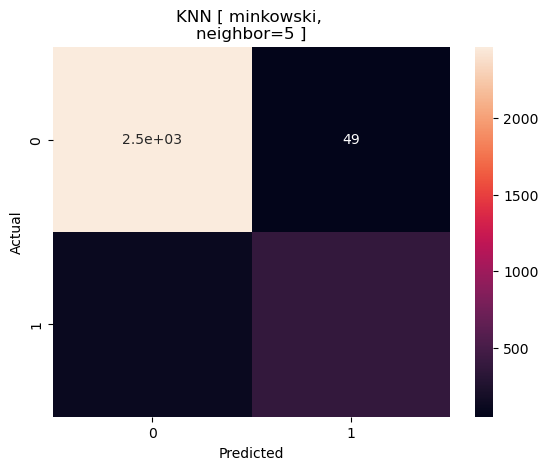

In [26]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], 
colnames=['Predicted']) 
sn.heatmap(conf_mat, annot=True).set(title ='''KNN [ minkowski, 
neighbor=5 ]''')

In [25]:
models = pd.DataFrame({ 
    'n_neighbors': ['1', '2','3','4','5'], 
    'Accuracy Score': 
[results[0],results[1],results[2],results[3],results[4]]}) 
models.sort_values(by='Accuracy Score') 
print(models.to_string(index=False))

n_neighbors  Accuracy Score
          1        0.927333
          2        0.928000
          3        0.939000
          4        0.934667
          5        0.946333
